In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**PATH Set**

In [2]:
dirname = '/kaggle/input'
train_path = os.path.join(dirname, 'kermany2018/OCT2017 /train')
train_normal_pth = os.path.join(train_path, 'NORMAL')
train_dme_pth = os.path.join(train_path, 'DME')
train_drusen_pth = os.path.join(train_path, 'DRUSEN')
train_cnv_pth = os.path.join(train_path, 'CNV')
    
test_path = os.path.join(dirname, 'kermany2018/OCT2017 /test')
test_normal_pth = os.path.join(test_path, 'NORMAL')
test_dme_pth = os.path.join(test_path, 'DME')
test_drusen_pth = os.path.join(test_path, 'DRUSEN')
test_cnv_pth = os.path.join(test_path, 'CNV')
    
val_path = os.path.join(dirname, 'kermany2018/OCT2017 /val')
val_normal_pth = os.path.join(val_path, 'NORMAL')
val_dme_pth = os.path.join(val_path, 'DME')
val_drusen_pth = os.path.join(val_path, 'DRUSEN')
val_cnv_pth = os.path.join(val_path, 'CNV')

In [3]:
print(test_normal_pth)
print(train_drusen_pth)

/kaggle/input/kermany2018/OCT2017 /test/NORMAL
/kaggle/input/kermany2018/OCT2017 /train/DRUSEN


In [4]:
import matplotlib.pyplot as plt

In [5]:
def plot_imgs(item_dir, num_imgs=4):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(16, 16))
    for idx, img_path in enumerate(item_files):
        plt.subplot(1, 4, idx+1)

        img = plt.imread(img_path)
        plt.imshow(img, cmap='bone')

    plt.tight_layout()


**NORMAL**

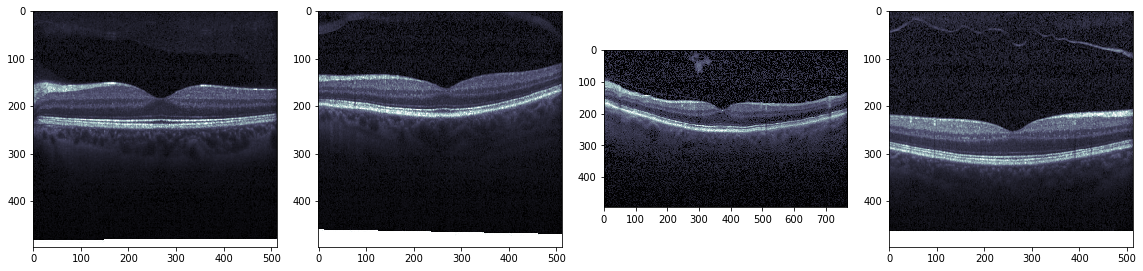

In [6]:
plot_imgs(train_normal_pth)

**DME**

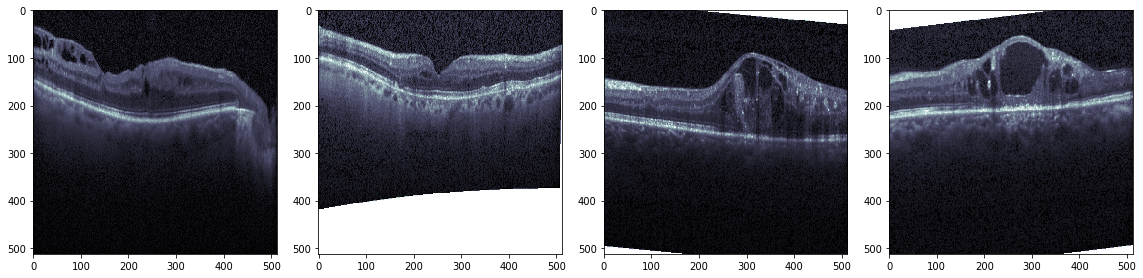

In [7]:
plot_imgs(train_dme_pth)

**DRUSEN**

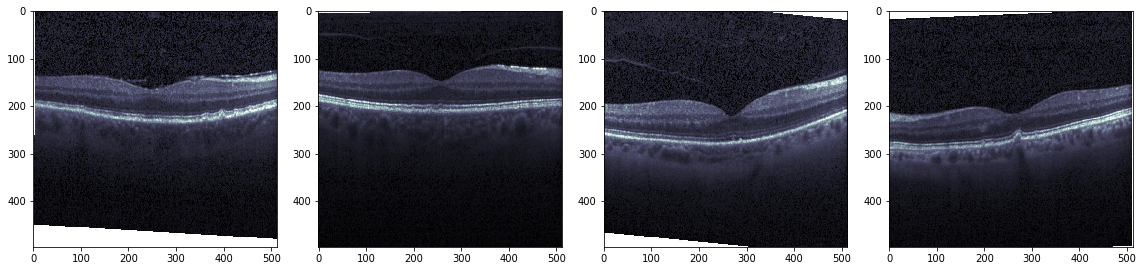

In [8]:
plot_imgs(train_drusen_pth)

**CNV**

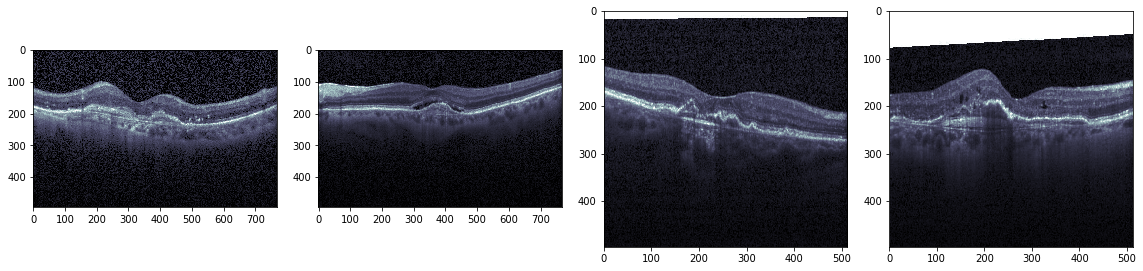

In [9]:
plot_imgs(train_cnv_pth)

**Detais about image dimensions**

In [10]:
import glob
from PIL import Image

In [11]:
def Images_details_Print_data(data, path):
    print(" ----->>>Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['min_height'] = min(height, data['min_height'])
        data['max_width'] = max(width, data['max_height'])
        
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)

**TRAIN**

In [12]:
Images_details(train_normal_pth)
Images_details(train_dme_pth)
Images_details(train_drusen_pth)
Images_details(train_cnv_pth)

 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/NORMAL
images_count:	26315
min_width:	384
max_width:	512
min_height:	496
max_height:	512
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/DME
images_count:	11348
min_width:	512
max_width:	1536
min_height:	496
max_height:	512
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/DRUSEN
images_count:	8616
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /train/CNV
images_count:	37205
min_width:	384
max_width:	512
min_height:	496
max_height:	496


**TEST**

In [13]:
Images_details(test_normal_pth)
Images_details(test_dme_pth)
Images_details(test_drusen_pth)
Images_details(test_cnv_pth)

 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/NORMAL
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/DME
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/DRUSEN
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /test/CNV
images_count:	242
min_width:	512
max_width:	512
min_height:	496
max_height:	496


**Validation**

In [14]:
Images_details(val_normal_pth)
Images_details(val_dme_pth)
Images_details(val_drusen_pth)
Images_details(val_cnv_pth)

 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/NORMAL
images_count:	8
min_width:	512
max_width:	512
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/DME
images_count:	8
min_width:	512
max_width:	768
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/DRUSEN
images_count:	8
min_width:	512
max_width:	768
min_height:	496
max_height:	496
 ----->>>Images in:  /kaggle/input/kermany2018/OCT2017 /val/CNV
images_count:	8
min_width:	512
max_width:	512
min_height:	496
max_height:	496


In [15]:
input_path = "/kaggle/input/kermany2018/OCT2017 /"

for _set in ['train', 'test', 'val']:
    normal = len(os.listdir(input_path + _set + '/NORMAL'))
    dme = len(os.listdir(input_path + _set + '/DME'))
    drusen = len(os.listdir(input_path + _set + '/DRUSEN'))
    cnv = len(os.listdir(input_path + _set + '/CNV'))
    print('{}, Normal images: {}, DME images: {}, DRUSEN images: {}, CNV images: {}'.format(_set, normal, dme, drusen, cnv))

train, Normal images: 26315, DME images: 11348, DRUSEN images: 8616, CNV images: 37205
test, Normal images: 242, DME images: 242, DRUSEN images: 242, CNV images: 242
val, Normal images: 8, DME images: 8, DRUSEN images: 8, CNV images: 8


dirname = '/kaggle/input'
train_path = os.path.join(dirname, 'kermany2018/OCT2017 /train')
train_normal_pth = os.path.join(train_path, 'NORMAL')
train_dme_pth = os.path.join(train_path, 'DME')
train_drusen_pth = os.path.join(train_path, 'DRUSEN')
train_cnv_pth = os.path.join(train_path, 'CNV')
    
test_path = os.path.join(dirname, 'kermany2018/OCT2017 /test')
test_normal_pth = os.path.join(test_path, 'NORMAL')
test_dme_pth = os.path.join(test_path, 'DME')
test_drusen_pth = os.path.join(test_path, 'DRUSEN')
test_cnv_pth = os.path.join(test_path, 'CNV')
    
val_path = os.path.join(dirname, 'kermany2018/OCT2017 /val')
val_normal_pth = os.path.join(val_path, 'NORMAL')
val_dme_pth = os.path.join(val_path, 'DME')
val_drusen_pth = os.path.join(val_path, 'DRUSEN')
val_cnv_pth = os.path.join(val_path, 'CNV')

In [16]:
datadir = '../input/kermany2018/OCT2017 /'
traindir = datadir + 'train/'
validdir = datadir + 'val/'
testdir = datadir + 'test/'

In [17]:
# Empty lists
categories = []
img_categories = []
n_train = []
n_valid = []
n_test = []
hs = []
ws = []

# Iterate through each category
for d in os.listdir(traindir):
    categories.append(d)

    # Number of each image
    train_imgs = os.listdir(traindir + d)
    valid_imgs = os.listdir(validdir + d)
    test_imgs = os.listdir(testdir + d)
    n_train.append(len(train_imgs))
    n_valid.append(len(valid_imgs))
    n_test.append(len(test_imgs))

    # Find stats for train images
    for i in train_imgs:
        img_categories.append(d)
        img = Image.open(traindir + d + '/' + i)
        img_array = np.array(img)
        # Shape
        hs.append(img_array.shape[0])
        ws.append(img_array.shape[1])

# Dataframe of categories
cat_df = pd.DataFrame({'category': categories,
                       'n_train': n_train,
                       'n_valid': n_valid, 'n_test': n_test}).\
    sort_values('category')

# Dataframe of training images
image_df = pd.DataFrame({
    'category': img_categories,
    'height': hs,
    'width': ws
})

cat_df.sort_values('n_train', ascending=False, inplace=True)
cat_df.head()

,category,n_train,n_valid,n_test
3,CNV,37205,8,242
0,NORMAL,26315,8,242
2,DME,11348,8,242
1,DRUSEN,8616,8,242


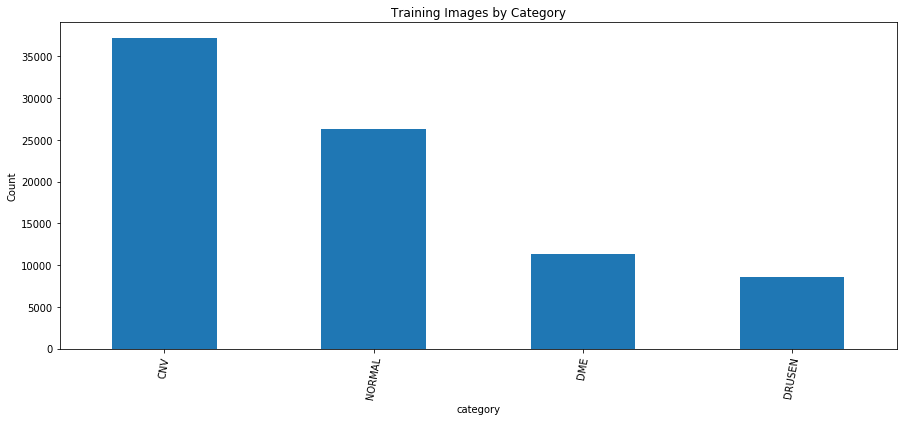

In [18]:
cat_df.set_index('category')['n_train'].plot.bar(figsize=(15, 6))
plt.xticks(rotation=80)
plt.ylabel('Count')
plt.title('Training Images by Category')
plt.show()

**Distribution of Images Sizes**

The images themselves have vastly different shapes. We can see this by looking at the stats of images sizes by category.

In [19]:
img_dsc = image_df.groupby('category').describe()
img_dsc.head()


height                                                           \
            count        mean       std    min    25%    50%    75%    max   
category                                                                     
CNV       37205.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
DME       11348.0  508.208671  6.803761  496.0  512.0  512.0  512.0  512.0   
DRUSEN     8616.0  496.000000  0.000000  496.0  496.0  496.0  496.0  496.0   
NORMAL    26315.0  500.132700  7.003275  496.0  496.0  496.0  512.0  512.0   

            width                                                              
            count        mean         std    min    25%    50%    75%     max  
category                                                                       
CNV       37205.0  736.372423  338.497157  384.0  512.0  512.0  768.0  1536.0  
DME       11348.0  564.788157  191.861512  512.0  512.0  512.0  512.0  1536.0  
DRUSEN     8616.0  670.692665  280.842588  512.0  512.0  512.0  768.0  1536.0  
NORMAL    26315.0  659.670606  288.606761  384.0  512.0  512.0  768.0  1536.0

In [20]:
import seaborn as sns

Text(0.5, 1.0, 'Average Size Distribution')

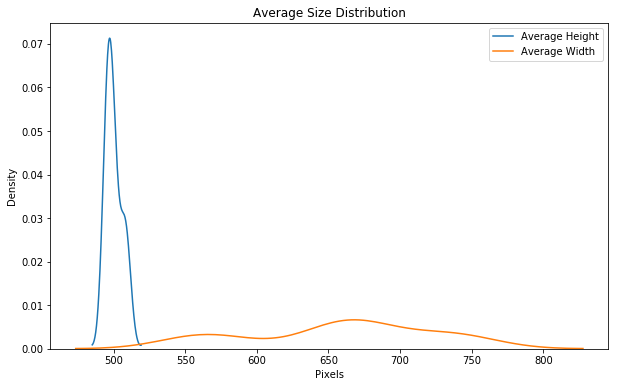

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    img_dsc['height']['mean'], label='Average Height')
sns.kdeplot(
    img_dsc['width']['mean'], label='Average Width')
plt.xlabel('Pixels')
plt.ylabel('Density')
plt.title('Average Size Distribution')

**DATA AUGMENTATION**

Because there are a limited number of images, we can use image augmentation to artificially increase the number of images "seen" by the network. This means for training, we randomly resize and crop the images and also flip them horizontally. A different random transformation is applied each epoch (while training), so the network effectively sees many different versions of the same image.The validation and testing data is not augmented but is only resized and normalized. The normalization values are standardized for Imagenet.

